In [37]:
import requests
import matplotlib.pyplot as plt
import numpy as np
import datetime as dt
import pandas as pd
from statistics import mean
pd.set_option('max_columns', None)
import sys
import seaborn as sns; sns.set_theme(color_codes=True)
if sys.version_info[0] < 3: 
    from StringIO import StringIO
else:
    from io import StringIO

In [38]:
#############################---Exercise 1 Start---###################################
'''
  Read all files, combine into a single dataframe. 
'''

# Read in all files
cfb16_csv = requests.get("https://raw.githubusercontent.com/porterjenkins/cs180-intro-data-science/master/data/cfb16.csv").text
cfb17_csv = requests.get("https://raw.githubusercontent.com/porterjenkins/cs180-intro-data-science/master/data/cfb17.csv").text
cfb18_csv = requests.get("https://raw.githubusercontent.com/porterjenkins/cs180-intro-data-science/master/data/cfb18.csv").text
cfb19_csv = requests.get("https://raw.githubusercontent.com/porterjenkins/cs180-intro-data-science/master/data/cfb19.csv").text
cfb20_csv = requests.get("https://raw.githubusercontent.com/porterjenkins/cs180-intro-data-science/master/data/cfb20.csv").text

# Prepare the csv files
cfb16 = StringIO(cfb16_csv)
cfb17 = StringIO(cfb17_csv)
cfb18 = StringIO(cfb18_csv)
cfb19 = StringIO(cfb19_csv)
cfb20 = StringIO(cfb20_csv)
allFiles = [cfb16, cfb17, cfb18, cfb19, cfb20]

# Make the dataframe
df16 = pd.read_csv(cfb16, sep=',')
df17 = pd.read_csv(cfb17, sep=',')
df18 = pd.read_csv(cfb18, sep=',')
df19 = pd.read_csv(cfb19, sep=',')
df20 = pd.read_csv(cfb20, sep=',')
allDfs = [df16, df17, df18, df19, df20]
df = pd.concat((f for f in allDfs), ignore_index=True)

print(df)
######################################################################################

                           Team  Games  Win  Loss  Off.Rank  Off.Plays  \
0                   Akron (MAC)     12    5     7        84        776   
1                 Alabama (SEC)     15   14     1        34       1056   
2    Appalachian St. (Sun Belt)     13   10     3        52        912   
3              Arizona (Pac-12)     12    3     9        67        815   
4          Arizona St. (Pac-12)     12    5     7        81        900   
..                          ...    ...  ...   ...       ...        ...   
626      West Virginia (Big 12)      9    5     4        42        690   
627         Western Ky. (C-USA)     11    5     6       120        699   
628         Western Mich. (MAC)      6    4     2        15        392   
629         Wisconsin (Big Ten)      6    3     3        93        431   
630     Wyoming (Mountain West)      6    2     4        82        409   

     Off.Yards  Off.Yards.Play  Off.TDs  Off.Yards.per.Game  Def.Rank  \
0         4649            5.99       3

In [39]:
#############################---Exercise 2 Start---###################################
'''
  Add a year column (from the original .csv file name to each row.
'''

# Get the last indices
lastIndex16 = df16.index.stop
lastIndex17 = df17.index.stop
lastIndex18 = df18.index.stop
lastIndex19 = df19.index.stop
lastIndex20 = df20.index.stop

startIndex = 0
endIndex = lastIndex16

for i in range(5):
  if i == 0:
    year = '2016'
    nextEnd = lastIndex17
  elif i == 1:
    year = '2017'
    nextEnd = lastIndex18
  elif i == 2:
    year = '2018'
    nextEnd = lastIndex19
  elif i == 3:
    year = '2019'
    nextEnd = lastIndex20
  elif i == 4:
    year = '2020'
    nextEnd = df.index # Gets count of all rows

  df.loc[startIndex:endIndex, 'Year'] = year
  startIndex = endIndex
  endIndex += nextEnd

# Print statements to check if we correctly categorized things
# print(df.iloc[:lastIndex16+1][['Team','Year']])
# print(df.iloc[lastIndex16-2:lastIndex16+lastIndex17+2][['Team','Year']])
# print(df.iloc[lastIndex16+lastIndex17-2:lastIndex16+lastIndex17+lastIndex18+2][['Team','Year']])
# print(df.iloc[lastIndex16+lastIndex17+lastIndex18-2:lastIndex16+lastIndex17+lastIndex18+lastIndex19+2][['Team','Year']])
# print(df.iloc[lastIndex16+lastIndex17+lastIndex18+lastIndex19-2:lastIndex16+lastIndex17+lastIndex18+lastIndex19+lastIndex20+2][['Team','Year']])

######################################################################################

In [40]:
#############################---Exercise 3 Start---###################################
'''
  Create a conference field by parsing the name team column. 

'''
teamNames = df['Team']
numRowsInDf = len(df)
all_conferences = []
for i in range(631):
  # Extract the team nam
  name = df['Team'][i]
  
  # Pull out the conference name
  indexOfOpenParenthesis = name.index('(')
  conferenceName = name[indexOfOpenParenthesis:]
  conferenceName = conferenceName.replace('(','')
  conferenceName = conferenceName.replace(')','')
  all_conferences.append(conferenceName)


df['Conference'] = all_conferences # Put the conference names in the dataframe
print(df.iloc[:60][['Team','Conference']])


######################################################################################

                                 Team       Conference
0                         Akron (MAC)              MAC
1                       Alabama (SEC)              SEC
2          Appalachian St. (Sun Belt)         Sun Belt
3                    Arizona (Pac-12)           Pac-12
4                Arizona St. (Pac-12)           Pac-12
5                      Arkansas (SEC)              SEC
6             Arkansas St. (Sun Belt)         Sun Belt
7   Army West Point (FBS Independent)  FBS Independent
8                        Auburn (SEC)              SEC
9                      Ball St. (MAC)              MAC
10                    Baylor (Big 12)           Big 12
11               Boston College (ACC)              ACC
12                Bowling Green (MAC)              MAC
13                      Buffalo (MAC)              MAC
14              BYU (FBS Independent)  FBS Independent
15                California (Pac-12)           Pac-12
16                Central Mich. (MAC)              MAC
17        

-------------------Offense-------------------
--Offensive Yards Per Game---
Mean Commentary: It appears that the SEC's mean is around 410 yards per game while the Big10 is close to 390 yards per game.
Overlap of distribution commentary: The SEC as a whole has more yards per game than the Big10. However, there is more variability amongst the SEC teams while there tends to be more uniformity in yards per game amongst Big10 teams. 
--Offensive Touchdowns---
Mean Commentary: Both the density and the mean are closer to each other in this graph. It apears that the SEC has 45 touchdowns and the Big10 has 29 touchdowns.
Overlap of distribution commentary: Both the SEC and the Big10 have very similar overlaps of distribution, with the Big10 being slightly lower, meaning that the Big10 tends to have slightly less touchdowns than the SEC.
-------------------Defence-------------------
--Points Allowed---
Mean Commentary: For points allowed, the means vary by about 50 points. However, the density o

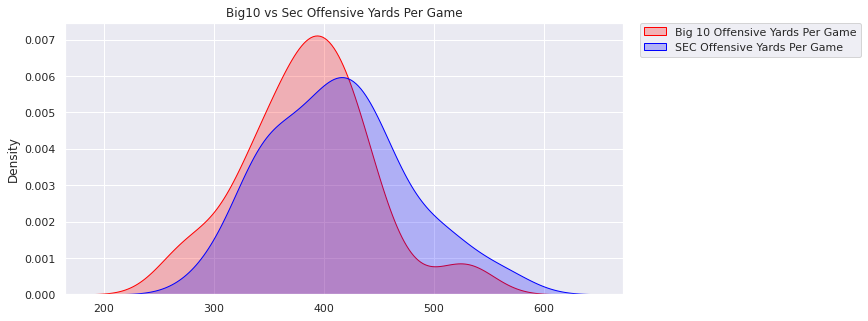

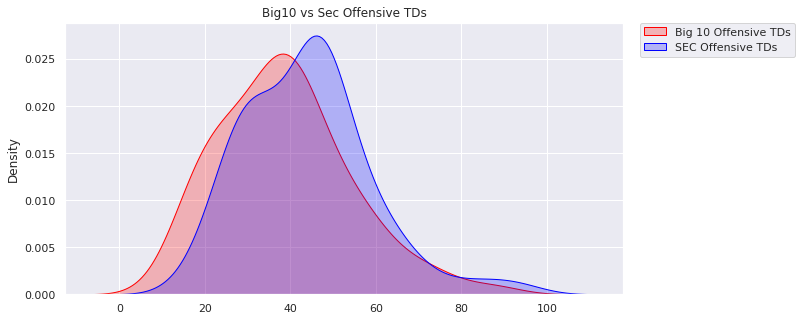

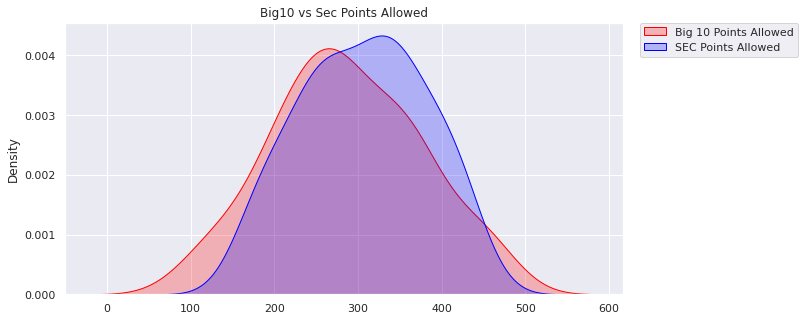

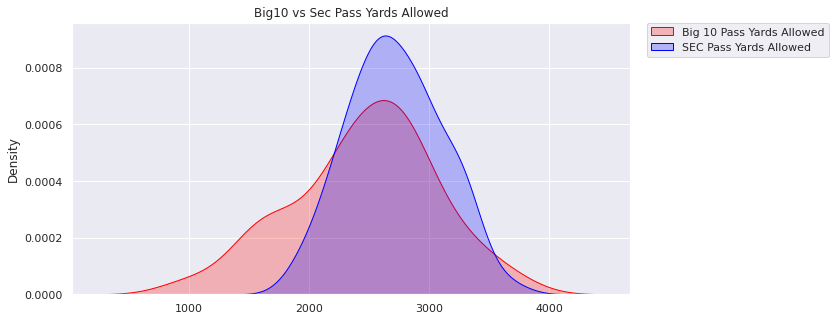

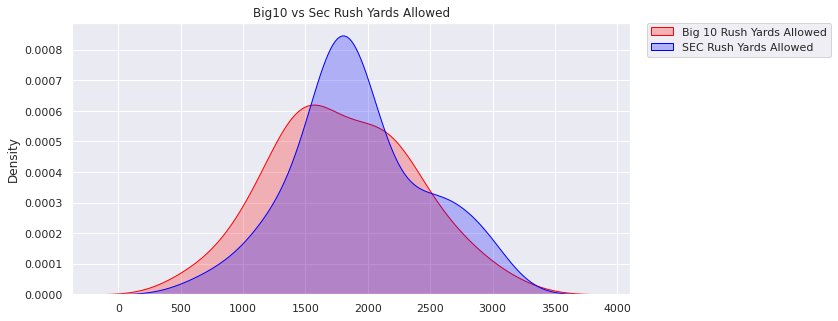

In [41]:
#############################---Exercise 4 Start---###################################
'''
  Offense:
    Is there a statistical difference between the Big Ten Conference and 
    the South Eastern Conference in terms of Off.Yards.per.Game? 
    Use seaborn KDE plot to create a figure.  Comment on the difference 
    in means and the overlap of distributions. 

    Do the same as above for Off.TDs 

  Defense:
    Is there a statistical difference between the Big Ten Conference and 
    the South Eastern Conference in terms  of Points.Allowed? Use seaborn 
    KDE plot to create a figure.  Comment on the difference in means and 
    the overlap of distributions. 

    Do the same as above for Opp.Pass.Yds.Allowed and Opp.Rush.Yards.Allowed
'''

print("-------------------Offense-------------------")

# Offence Yards per game
bigTenOffensiveYardsList = df.loc[df['Conference'] == 'Big Ten', 'Off.Yards.per.Game'].values.tolist() # Select Off.Yards.per.Game where Conference = Big Ten Conference
secOffensiveYardsList = df.loc[df['Conference'] == 'SEC', 'Off.Yards.per.Game'].values.tolist()
## Plot the results
fig, ax = plt.subplots()
sns.kdeplot(data=bigTenOffensiveYardsList, color='red', fill=True, label="Big 10 Offensive Yards Per Game")
sns.kdeplot(data=secOffensiveYardsList, color='blue', fill=True, label="SEC Offensive Yards Per Game")
ax.set_title("Big10 vs Sec Offensive Yards Per Game")
ax.plot()
## plot legend
ax.legend(bbox_to_anchor=(1.02, 1.02), loc='upper left')
ax.plot()
print("--Offensive Yards Per Game---")
print("Mean Commentary: It appears that the SEC's mean is around 410 yards per game while the Big10 is close to 390 yards per game.")
print("Overlap of distribution commentary: The SEC as a whole has more yards per game than the Big10. However, there is more variability amongst the SEC teams while there tends to be more uniformity in yards per game amongst Big10 teams. ")


# Offense Touchdowns
bigTenOffensiveTdsList = df.loc[df['Conference'] == 'Big Ten', 'Off.TDs'].values.tolist() # Select Off.TDs where Conference = Big Ten Conference
secOffensiveTdsList = df.loc[df['Conference'] == 'SEC', 'Off.TDs'].values.tolist()
## Plot the results
fig, ax = plt.subplots()
sns.kdeplot(data=bigTenOffensiveTdsList, color='red', fill=True, label="Big 10 Offensive TDs")
sns.kdeplot(data=secOffensiveTdsList, color='blue', fill=True, label="SEC Offensive TDs")
ax.set_title("Big10 vs Sec Offensive TDs")
ax.plot()
## plot legend
ax.legend(bbox_to_anchor=(1.02, 1.02), loc='upper left')
ax.plot()
print("--Offensive Touchdowns---")
print("Mean Commentary: Both the density and the mean are closer to each other in this graph. It apears that the SEC has 45 touchdowns and the Big10 has 29 touchdowns.")
print("Overlap of distribution commentary: Both the SEC and the Big10 have very similar overlaps of distribution, with the Big10 being slightly lower, meaning that the Big10 tends to have slightly less touchdowns than the SEC.")

print("-------------------Defence-------------------")

## Defence Points allowed per game
bigTenPointsAllowedList = df.loc[df['Conference'] == 'Big Ten', 'Points.Allowed'].values.tolist() # Select Points.Allowed where Conference = Big Ten Conference
secPointsAllowedList = df.loc[df['Conference'] == 'SEC', 'Points.Allowed'].values.tolist()
## Plot the results
fig, ax = plt.subplots()
sns.kdeplot(data=bigTenPointsAllowedList, color='red', fill=True, label="Big 10 Points Allowed")
sns.kdeplot(data=secPointsAllowedList, color='blue', fill=True, label="SEC Points Allowed")
ax.set_title("Big10 vs Sec Points Allowed")
ax.plot()
## plot legend
ax.legend(bbox_to_anchor=(1.02, 1.02), loc='upper left')
ax.plot()
print("--Points Allowed---")
print("Mean Commentary: For points allowed, the means vary by about 50 points. However, the density of both means is very close, so we can be confident in the comparison of the means.")
print("Overlap of distribution commentary: It appears that the Big10 has some very strong defenses and also some very weak defenses, while the SEC defenses are more at the same level. However the mean of the two conferences aligns because of the spread.")


## Defence Opponent pass yards allowed per game
big10PassYrdAllowedList = df.loc[df['Conference'] == 'Big Ten', 'Opp.Pass.Yds.Allowed'].values.tolist() # Select Points.Allowed where Conference = Big Ten Conference
secPassYrdAllowedList = df.loc[df['Conference'] == 'SEC', 'Opp.Pass.Yds.Allowed'].values.tolist()
## Plot the results
fig, ax = plt.subplots()
sns.kdeplot(data=big10PassYrdAllowedList, color='red', fill=True, label="Big 10 Pass Yards Allowed")
sns.kdeplot(data=secPassYrdAllowedList, color='blue', fill=True, label="SEC Pass Yards Allowed")
ax.set_title("Big10 vs Sec Pass Yards Allowed")
ax.plot()
## plot legend
ax.legend(bbox_to_anchor=(1.02, 1.02), loc='upper left')
ax.plot()
print("--Pass Yards Allowed---")
print("Mean Commentary: Interesting! Both the SEC and the Big10 allow the same mean pass yards per game, however density is different.")
print("Overlap of distribution commentary: Like we have seen previously, some Big10 teams are GREAT and some are AWEFUL which results in a mean that is close to the SEC where most teams are in the same boat for pass yards per game.")


## Defence Opponent rush yards allowed per game
big10RushYrdAllowedList = df.loc[df['Conference'] == 'Big Ten', 'Opp.Rush.Yards.Alloweed'].values.tolist() # Select Points.Allowed where Conference = Big Ten Conference
secRushYrdAllowedList = df.loc[df['Conference'] == 'SEC', 'Opp.Rush.Yards.Alloweed'].values.tolist()
## Plot the results
fig, ax = plt.subplots()
sns.kdeplot(data=big10RushYrdAllowedList, color='red', fill=True, label="Big 10 Rush Yards Allowed")
sns.kdeplot(data=secRushYrdAllowedList, color='blue', fill=True, label="SEC Rush Yards Allowed")
ax.set_title("Big10 vs Sec Rush Yards Allowed")
ax.plot()
## plot legend
ax.legend(bbox_to_anchor=(1.02, 1.02), loc='upper left')
ax.plot()
print("--Rush Yards Allowed---")
print("Mean Commentary: The Big10's mean is around 1500. The SEC's mean is aroudn 1700. The density of the mean differs by about .00025")
print("Overlap of distribution commentary: The distribution appears to be very similar to the passing yards allowed statistic. Due to the lower mean, the Big10 appears to be better at stopping the run. However, due to the lower density of the Big10's mean, there is less consistency among teams in the Big10 who can replicate that mean in real life.")
######################################################################################

There is a general downward trend for the graph. I believe that this is a realiable trend. Because almost every following year has less yards per game than the last.


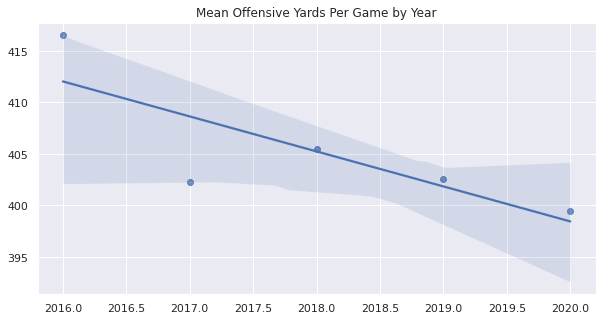

I believe this is a spurious trend, annd not a permanent one. The variance is large and the I believe that the Covid season would affect team preparedness.


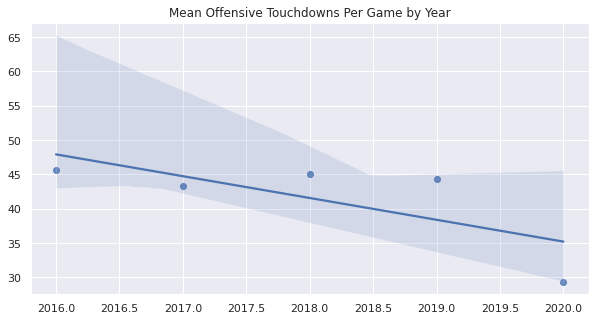

Mean points allowed is heavily associated with offensive touchdowns. Because of this strong relationship, I believe that the trend is spruious.


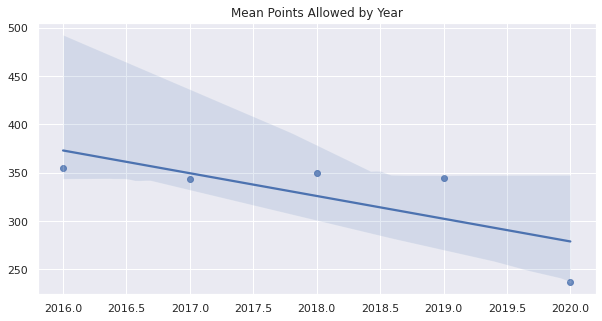

I admit that I watch a ton of football. The game is becoming more pass-centric. I don't believe the outlier year in 2020 accurately reflects college football. The actual mean suggests that passing yards are holding level.


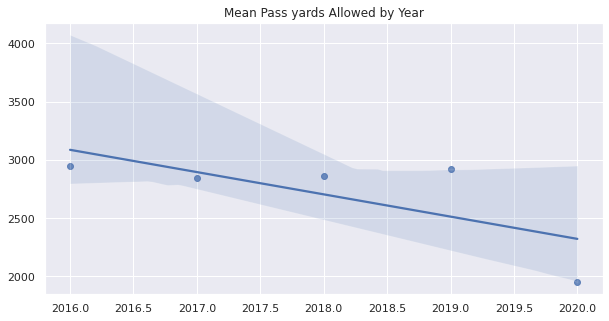

Just like the mean passing yards, rushing yards didn't change much from year to year except the outlier 2020 year. If this is an aggregate total of yards in a season, a shortened 2020 season would make sense. I believe this is not a trend.


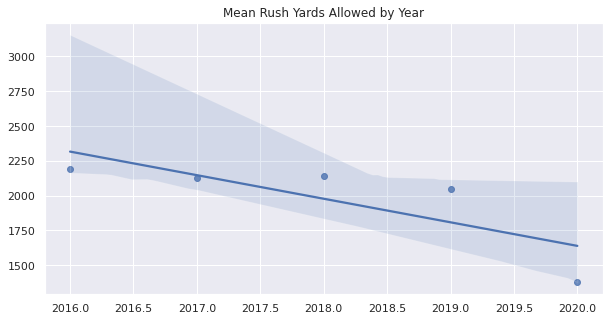

In [42]:
#############################---Exercise 5 Start---###################################
'''
  Offense:
  
  Is the offense changing over time? Create plot showing the average offensive production 
  over time (each year). Also include an estimate of the variability in your figure.  
  Comment on whether any trends you see are likely to be true or spurious. 
  Create a plot for the following metrics:
    Off.Yards.per.Game, Off.TDs

  Defense:

  Is the offense changing over time? Create plot showing the average offensive 
  production over time (each year). Also include an estimate of the variability 
  in your figure.  Comment on whether any trends you see are likely to be true 
  or spurious. Create a plot for the following metrics:
    Points.Allowed
    Opp.Pass.Yds.Allowed
    Opp.Rush.Yards.Alloweed
'''

# Collect data
years = [2016, 2017, 2018, 2019, 2020]
offYardsPerGame = []
offTds = []
pointsAllowed = []
passYrdsAllowed = []
rushYrdsAllowed = []
for year in years:

  val = mean(df.loc[df['Year'] == str(year), 'Off.Yards.per.Game'].values.tolist())
  offYardsPerGame.append(float(val))

  val = mean(df.loc[df['Year'] == str(year), 'Off.TDs'].values.tolist())
  offTds.append(float(val))

  val = mean(df.loc[df['Year'] == str(year), 'Points.Allowed'].values.tolist())
  pointsAllowed.append(float(val))

  val = mean(df.loc[df['Year'] == str(year), 'Opp.Pass.Yds.Allowed'].values.tolist())
  passYrdsAllowed.append(float(val))

  val = mean(df.loc[df['Year'] == str(year), 'Opp.Rush.Yards.Alloweed'].values.tolist())
  rushYrdsAllowed.append(float(val))

# Offense
years = np.array(years)
years = years.astype(int)

sns.set(rc = {'figure.figsize':(10,5)})

## Offensive Yards per game
print("There is a general downward trend for the graph. I believe that this is a realiable trend. Because almost every following year has less yards per game than the last.")
fig, ax = plt.subplots()
ax = sns.regplot(x=years, y=offYardsPerGame)
ax.set_title("Mean Offensive Yards Per Game by Year")
ax.plot()
plt.show()

## Offensive touchdowns
print("I believe this is a spurious trend, annd not a permanent one. The variance is large and the I believe that the Covid season would affect team preparedness.")
fig, ax = plt.subplots()
sns.regplot(x=years, y=offTds)
ax.set_title("Mean Offensive Touchdowns Per Game by Year")
ax.plot()
plt.show()

# Defence

## Points alllowed
print("Mean points allowed is heavily associated with offensive touchdowns. Because of this strong relationship, I believe that the trend is spruious.")
fig, ax = plt.subplots()
sns.regplot(x=years, y=pointsAllowed)
ax.set_title("Mean Points Allowed by Year")
ax.plot()
plt.show()

## Pass yards allowed
print("I admit that I watch a ton of football. The game is becoming more pass-centric. I don't believe the outlier year in 2020 accurately reflects college football. The actual mean suggests that passing yards are holding level.")
fig, ax = plt.subplots()
sns.regplot(x=years, y=passYrdsAllowed)
ax.set_title("Mean Pass yards Allowed by Year")
ax.plot()
plt.show()

## Rush yards allowed
print("Just like the mean passing yards, rushing yards didn't change much from year to year except the outlier 2020 year. If this is an aggregate total of yards in a season, a shortened 2020 season would make sense. I believe this is not a trend.")
fig, ax = plt.subplots()
sns.regplot(x=years, y=rushYrdsAllowed)
ax.set_title("Mean Rush Yards Allowed by Year")
ax.plot()
plt.show()
######################################################################################